# Import libraries and read file

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = 'MoMo Talent 2024_DA_Case Study Round_Questions.xlsx'
transactions_df = pd.read_excel(file_path, sheet_name='Data Transactions')
commission_df = pd.read_excel(file_path, sheet_name='Data Commission')
user_df = pd.read_excel(file_path, sheet_name='Data User_Info')

In [3]:
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'], dayfirst=True, format='mixed', errors='coerce')

In [4]:
transactions_df

,user_id,order_id,Date,Amount,Merchant_id,Purchase_status
0,21269588,4169517626,2020-01-01,"10,000",13,NaN
1,28097592,4170276686,2020-01-01,"20,000",13,NaN
2,47435144,4166729310,2020-01-01,"10,000",12,NaN
3,29080935,4174460303,2020-01-01,"10,000",13,NaN
4,14591075,4168216749,2020-01-01,"10,000",12,NaN
...,...,...,...,...,...,...
13490,54337200,8720390921,2020-12-31,"20,000",12,NaN
13491,59931360,8718580146,2020-12-31,"100,000",12,NaN
13492,46156488,8717515352,2020-12-31,"20,000",12,NaN
13493,35858614,8716668316,2020-12-31,"10,000",12,NaN


In [5]:
commission_df

,Merchant_name,Merchant_id,Rate_pct
0,Viettel,12,2
1,Mobifone,13,3
2,Vinaphone,14,4
3,Vietnamobile,15,4
4,Gmobile,16,4


In [6]:
user_df.head()

,User_id,First_tran_date,Location,Age,Gender
0,41654498,2018-05-02,HCMC,33_to_37,MALE
1,51276281,2019-12-08,Other Cities,unknown,MALE
2,49152375,2019-12-20,Other Cities,23_to_27,MALE
3,5971050,2019-08-01,HCMC,28_to_32,MALE
4,48134464,2019-08-23,Other Cities,18_to_22,FEMALE


# Part A

In [7]:
transactions_df['Amount'] = transactions_df['Amount'].replace(',', '', regex=True).astype(float)

transactions_merged_df = transactions_df.merge(commission_df, on='Merchant_id', how='left')

transactions_merged_df['Revenue'] = transactions_merged_df['Amount'] * transactions_merged_df['Rate_pct'] / 100

In [8]:
transactions_merged_df

,user_id,order_id,Date,Amount,Merchant_id,Purchase_status,Merchant_name,Rate_pct,Revenue
0,21269588,4169517626,2020-01-01,10000.0,13,NaN,Mobifone,3,300.0
1,28097592,4170276686,2020-01-01,20000.0,13,NaN,Mobifone,3,600.0
2,47435144,4166729310,2020-01-01,10000.0,12,NaN,Viettel,2,200.0
3,29080935,4174460303,2020-01-01,10000.0,13,NaN,Mobifone,3,300.0
4,14591075,4168216749,2020-01-01,10000.0,12,NaN,Viettel,2,200.0
...,...,...,...,...,...,...,...,...,...
13490,54337200,8720390921,2020-12-31,20000.0,12,NaN,Viettel,2,400.0
13491,59931360,8718580146,2020-12-31,100000.0,12,NaN,Viettel,2,2000.0
13492,46156488,8717515352,2020-12-31,20000.0,12,NaN,Viettel,2,400.0
13493,35858614,8716668316,2020-12-31,10000.0,12,NaN,Viettel,2,200.0


1. Using data from the 'Commission' table, add a column 'Revenue' in the 'Transactions' table that displays MoMo's earned revenue for each order, and then calculate MoMo's total revenue in January 2020.

In [9]:
transactions_jan2020 = transactions_merged_df[(transactions_merged_df['Date'] >= '2020-01-01') & (transactions_merged_df['Date'] <= '2020-01-31')]

total_revenue_jan2020 = transactions_jan2020['Revenue'].sum()

print(f"MoMo's total revenue in January 2020: {total_revenue_jan2020} VNĐ")

MoMo's total revenue in January 2020: 1409827.02 VNĐ


2. What is MoMo's most profitable month?

In [10]:
transactions_merged_df['YearMonth'] = transactions_merged_df['Date'].dt.to_period('M')

monthly_revenue = transactions_merged_df.groupby('YearMonth')['Revenue'].sum().reset_index()

In [11]:
monthly_revenue

,YearMonth,Revenue
0,2020-01,1409827.02
1,2020-02,1378500.00
2,2020-03,1584000.00
3,2020-04,1488300.00
4,2020-05,1463700.00
5,2020-06,1617200.00
6,2020-07,1581900.00
7,2020-08,1618700.00
8,2020-09,1702200.00
9,2020-10,1690900.00


In [12]:
most_profitable_month = monthly_revenue.loc[monthly_revenue['Revenue'].idxmax()]

print(f"The profitable month is {most_profitable_month.iloc[0]} with a revenue of {most_profitable_month.iloc[1]} VNĐ")

The profitable month is 2020-09 with a revenue of 1702200.0 VNĐ


3. What day of the week does MoMo make the most money, on average? The least money?

In [13]:
transactions_merged_df['DayOfWeek'] = transactions_merged_df['Date'].dt.day_name()

average_revenue_per_day = transactions_merged_df.groupby('DayOfWeek')['Revenue'].mean().reset_index()

most_profitable_day = average_revenue_per_day.loc[average_revenue_per_day['Revenue'].idxmax()]

least_profitable_day = average_revenue_per_day.loc[average_revenue_per_day['Revenue'].idxmin()]

average_revenue_per_day

,DayOfWeek,Revenue
0,Friday,1408.213041
1,Monday,1304.437564
2,Saturday,1376.099946
3,Sunday,1308.042408
4,Thursday,1411.190598
5,Tuesday,1401.358412
6,Wednesday,1482.535075


In [14]:
print(f"Day of the week does MoMo make the most money, on average {most_profitable_day.iloc[0]} with a revenue of {round(most_profitable_day.iloc[1],2)} VNĐ")

Day of the week does MoMo make the most money, on average Wednesday with a revenue of 1482.54 VNĐ


In [15]:
print(f"Day of the week does MoMo make the least money, on average {least_profitable_day.iloc[0]} with a revenue of {round(least_profitable_day.iloc[1],2)} VNĐ")

Day of the week does MoMo make the least money, on average Monday with a revenue of 1304.44 VNĐ


4. Combined with the 'User_Info' table, add columns: Age, Gender, Location, Type_user (New/Current) in 'Transactions' table and calculate the total number of new users in December 2020.

In [16]:
transactions_merged_with_user_info = transactions_merged_df.merge(user_df, left_on='user_id', right_on='User_id', how='left')

transactions_merged_with_user_info['First_tran_date'] = pd.to_datetime(transactions_merged_with_user_info['First_tran_date'], errors='coerce')

transactions_merged_with_user_info['Type_user'] = transactions_merged_with_user_info.apply(
    lambda row: 'New' if row['Date'].month == row['First_tran_date'].month and row['Date'].year == row['First_tran_date'].year else 'Current', axis=1)

transactions_dec2020 = transactions_merged_with_user_info[(transactions_merged_with_user_info['Date'] >= '2020-12-01') & (transactions_merged_with_user_info['Date'] <= '2020-12-31')]



In [17]:
new_users_dec2020 = transactions_dec2020[transactions_dec2020['Type_user'] == 'New']['user_id'].nunique()
print(f"Total number of new users in December 2020: {new_users_dec2020}")

Total number of new users in December 2020: 72


# Part B

TypeError: float() argument must be a string or a real number, not 'Period'

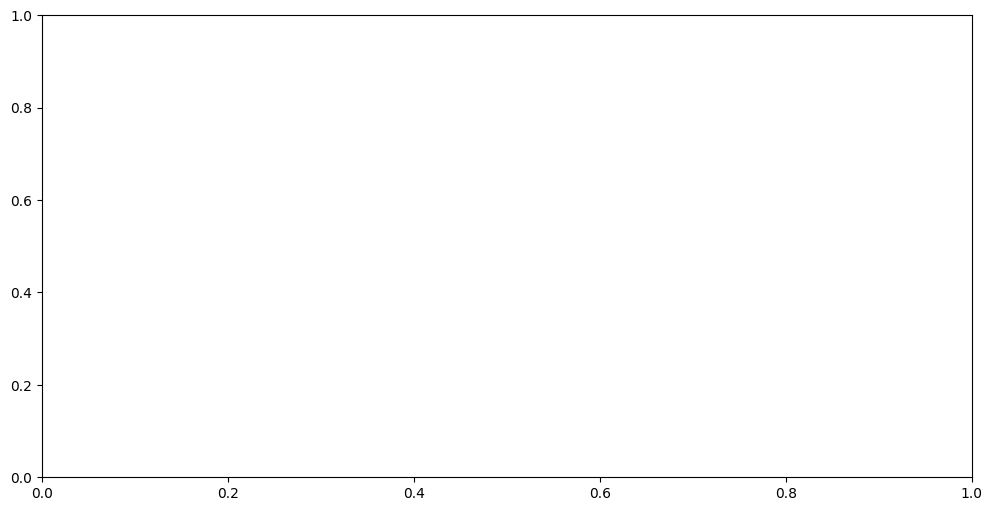

In [20]:
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
monthly_revenue.index = monthly_revenue.index.map(month_names)
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue, marker='o', linestyle='-')
plt.title('Total Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (Vietnamese Dong)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('total_monthly_revenue.png')
plt.show()

# Part C

Based on the provided data, what observations and insights can you draw about user demographics and transaction behavior (e.g. trends, classifications)?

1. Transaction Trends: 

    Analyze the frequency and amount of transactions over time to identify any trends or patterns, such as increased activity during specific periods (e.g., holidays).

2. User Demographics: 

    Assess how different age groups, genders, and locations interact with the services. This might reveal which demographic segments are more engaged or spend more.

3. Merchant Analysis: 

    Look into which merchants have the most transactions and how commission rates impact transaction volumes.

4. Purchase Status: 

    Although currently empty, this field could potentially offer insights into transaction success rates or common issues faced by users.

Do you have any advice for the Marketing department in designing promotion campaigns to increase Topup's monthly performance?

1. Segmented Targeting

    Demographic-Based Promotions: Use the Data User_Info to tailor promotions based on age, gender, and location. For instance, if younger demographics (e.g., 18_to_22) are more active, consider offers that resonate with their preferences, like small but frequent top-up bonuses.

    Location-Specific Campaigns: If certain locations show higher transaction volumes or values, tailor specific campaigns for these areas, possibly with location-based incentives.

2. Behavioral Targeting

    First-Time User Offers: Encourage first-time users with special discounts or bonus credits on their initial transactions, which can be identified from First_tran_date.

    Loyalty Rewards: For users with frequent transactions, introduce a loyalty program offering incremental benefits, encouraging continued engagement.

3. Time-Based Promotions

    Analyzing Peak Times: Identify peak transaction times and days from the Data Transactions. Offer special promotions during these times to maximize participation.

    Seasonal Campaigns: Analyze transaction trends across different months to determine if there are any seasonal patterns. Tailor campaigns around these trends, such as increased top-up bonuses during holiday seasons or special events.

4. Partnership and Bundling

    Merchant Collaborations: Partner with merchants (from Data Commission) to offer bundled services or cross-promotions. For instance, collaborate with high-commission merchants to provide exclusive top-up deals when using their services.

    Cross-Promotional Discounts: Offer discounts or additional top-up credits when users engage with other services provided by MoMo, fostering an ecosystem of usage.

5. Data-Driven Adjustments

    Performance Analysis: Regularly analyze the performance of different campaigns, adjusting tactics based on what works best. Use A/B testing to compare different promotions and refine strategies based on data insights.

    Feedback Loop: Implement a system to gather user feedback on promotions to understand user satisfaction and areas for improvement.

6. Communication and Outreach

    Effective Messaging: Ensure that the promotion messages are clear, attractive, and effectively communicated through the right channels (social media, app notifications, SMS, etc.).

    Engagement Through Social Media: Leverage social media platforms to engage users with interactive content related to top-up promotions, such as quizzes, giveaways, or user-generated content.



Momo is facing stiff competition from a host of other e-wallets that have deep mobile card cashback schemes for users. In response, MoMo is considering deducting a part of revenue to increase cashback for users in all Telco merchants.

Suppose that users currently earn a flat 1% cash-back on their spending amount. The proposed change is as follows:

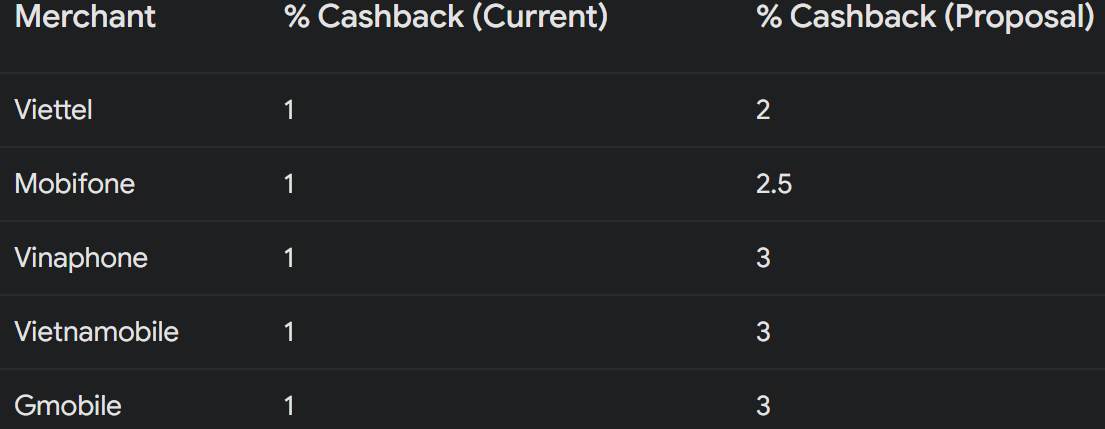

How does this affect the service (Comment from many perspectives)? Do you agree with this option?

1. Financial Perspective

    Revenue Impact: Increasing cashback will reduce the margin per transaction. If the increase in transaction volume does not offset the higher cashback costs, it could lead to reduced net revenue.

    Cost Management: This strategy implies that MoMo is willing to sacrifice short-term profits for long-term gains in market share. The key will be to carefully manage the balance between attractive cashback incentives and the sustainability of the business model.

2. Market Perspective

    Competitive Positioning: Higher cashback can make MoMo more appealing compared to competitors, potentially increasing its market share. This strategy can be particularly effective if competitors are unable to match the cashback offers due to financial constraints.

    Customer Attraction and Retention: Increased cashback can attract new users and increase loyalty among existing users. Users may be more inclined to use MoMo for their transactions if they feel they are getting better value compared to other services.

3. User Experience Perspective

    Perceived Value: Higher cashback directly enhances the perceived value of the service to users. This can lead to increased user satisfaction and positive word-of-mouth, further boosting user acquisition.

    Engagement: Enhanced cashback offers can encourage more frequent transactions and greater engagement with the platform, possibly leading to increased usage of other MoMo services.
    Strategic Perspective

    Long-Term Growth: Investing in user growth through cashback might be a strategic move to capture a larger user base, which is crucial for the network effects in the e-wallet industry.

    Differentiation: By offering the highest cashback rates, MoMo could differentiate itself in a crowded market, assuming that competitors do not immediately match these offers.

4. Risks

    Financial Sustainability: The key risk is the financial sustainability of offering higher cashback rates. It’s crucial that the increased user base and transaction volume compensate for the reduced per-transaction revenue.

    Competitor Reaction: Competitors might respond by launching their own enhanced cashback or other incentive programs, potentially leading to a "race to the bottom" where profit margins are continually eroded.

Conclusion

    I generally agree with the proposal to increase cashback rates, especially if MoMo’s market analysis suggests that cashback is a major decision factor for its users. However, it’s essential to monitor the financial impacts closely and have a flexible strategy that can be adjusted based on market response and financial outcomes. It's also crucial to consider additional value-added services or improvements in user experience that can complement the cashback offers to create a more sustainable competitive advantage.



What other Topup development strategy ideas do you have for MoMo?

1. Enhanced User Experience

    Simplified Transaction Process: Streamline the top-up process to require fewer steps and faster completion times. Implement intuitive UI/UX enhancements to make navigation and operation more user-friendly.

    Instant Notifications: Develop real-time notifications for successful transactions, promotions, and personalized offers based on user behavior and preferences.

2. Customized Offers and Personalization

    Dynamic Pricing Models: Introduce flexible pricing where top-up bonuses or discounts can vary based on the user's purchase history, loyalty, or time of transaction.

    Personalized Marketing: Use machine learning to analyze user data and provide tailored offers and recommendations. For instance, predict when users are likely to need a top-up based on their usage patterns and prompt them with timely offers.

3. Loyalty and Rewards Programs

    Tiered Loyalty System: Implement a tiered loyalty program that rewards users based on their transaction volume or frequency. Benefits could include higher cashback percentages, exclusive access to new services, or special offers with partner brands.

    Gamification: Introduce elements of gamification such as earning points for transactions, which can be redeemed for rewards or used for contests and sweepstakes.

4. Strategic Partnerships and Integration

    Collaborate with Telecom Operators: Strengthen partnerships with telecom operators to offer exclusive services, bundled packages, or co-branded products that enhance value for both MoMo and the operator’s customers.

    Cross-Industry Partnerships: Expand partnerships beyond telecom to include entertainment, utilities, or finance sectors, offering bundled top-up deals when paying bills or purchasing services.

5. Technology-Driven Innovations

    Blockchain for Transparency and Security: Explore the use of blockchain technology to enhance transparency and security in transactions, which could also reduce costs associated with fraud and chargebacks.

    AI and Machine Learning: Utilize AI to enhance fraud detection, automate customer support via chatbots, and improve financial analytics for predicting market trends and user behaviors.

6. Financial Inclusion Initiatives

    Micro Top-ups: Offer micro top-ups at a very low cost to cater to budget-conscious consumers, potentially increasing the frequency of transactions.

    Rural Expansion Programs: Develop specific programs aimed at increasing the penetration of mobile top-up services in underserved rural areas, possibly through mobile agents or localized service centers.

7. Sustainability and Corporate Responsibility

    Eco-friendly Initiatives: Launch initiatives to offset the carbon footprint of digital transactions or contribute to social causes, enhancing corporate image and appealing to environmentally and socially conscious consumers.